# 8. 回归
我们所知道的回归是由达尔文的表兄弟Francis Galton发明的。其于1877年完成了第一次回归预测，目的是根据上一代豌豆种子（双亲）的尺寸来预测下一代豌豆种子（孩子）的尺寸。Galton在大量对象上应用了回归分析，甚至包括人的身高。他注意到，如果双亲的高度比平均高度高，他们的子女也倾向于比平均高度高，但尚不及双亲。孩子的高度向着平均高度回退（回归）。Galton在多项研究上都注意到这个现象，尽管这个英文单词跟数值预测没有任何关系，但这种研究方法仍被称作回归。

## 8.1. 标准回归函数
通过使平方误差最小来求回归系数$\omega$，平方误差可以写做：$\sum_{i=1}^m(y_i-x_i^T\omega)^2$,其中$y_i$表示真实的标签值$x_i^T\omega$表示预测的标签值，用矩阵表示还可以写成$(y-X\omega)^T(y-X\omega)$。如果对$\omega$求导，得到$X^T(Y-X\omega)$，令其等于零，解出$\omega$如下：

$
\hat{\omega}=(X^TX)^{-1}X^Ty
$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
'''
根据上面的公式编码：
需要考虑矩阵是否可逆，linalg.dat计算行列式，值为0表示矩阵不可逆
'''
def strandRegress(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matris is singular, cannot do inverse")
        return
    ws = xTx.I*(xMat.T*yMat)
    return ws

In [8]:
datadf = pd.read_csv("ex0.txt", sep='\t', header=None)
dataArr = datadf.iloc[:,0:-1]
labels = datadf.iloc[:,-1]
ws = strandRegress(dataArr, labels)

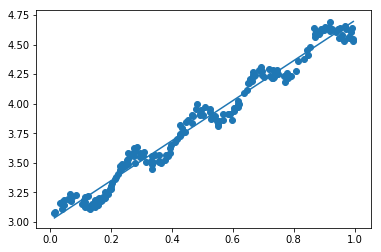

In [11]:
xMat = np.mat(dataArr)
yMat = np.mat(labels)
yHat = xMat*ws
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])
xCopy = xMat.copy()
xCopy.sort(0)
yHat=xCopy*ws
ax.plot(xCopy[:,1],yHat)
plt.show()

In [17]:
xMat[:,1].flatten().A[0]

array([0.067732, 0.42781 , 0.995731, 0.738336, 0.981083, 0.526171,
       0.378887, 0.033859, 0.132791, 0.138306, 0.247809, 0.64827 ,
       0.731209, 0.236833, 0.969788, 0.607492, 0.358622, 0.147846,
       0.63782 , 0.230372, 0.070237, 0.067154, 0.925577, 0.717733,
       0.015371, 0.33507 , 0.040486, 0.212575, 0.617218, 0.541196,
       0.045353, 0.126762, 0.556486, 0.901144, 0.958476, 0.274561,
       0.394396, 0.87248 , 0.409932, 0.908969, 0.166819, 0.665016,
       0.263727, 0.231214, 0.552928, 0.047744, 0.365746, 0.495002,
       0.493466, 0.792101, 0.76966 , 0.251821, 0.181951, 0.808177,
       0.334116, 0.33863 , 0.452584, 0.69477 , 0.590902, 0.307928,
       0.148364, 0.70218 , 0.721544, 0.666886, 0.124931, 0.618286,
       0.381086, 0.385643, 0.777175, 0.116089, 0.115487, 0.66351 ,
       0.254884, 0.993888, 0.295434, 0.952523, 0.307047, 0.277261,
       0.279101, 0.175724, 0.156383, 0.733165, 0.848142, 0.771184,
       0.429492, 0.162176, 0.917064, 0.315044, 0.201473, 0.297